In [55]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [56]:
%matplotlib inline

In [57]:
pd.set_option('display.max_columns', None)  # при вызове .head будет показывать все колонки

In [4]:
data = pd.read_csv('train.csv')

### Знакомство с данными

In [5]:
data.shape  # size of dataframe

(15129, 21)

In [6]:
data.info()  # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15129 non-null  int64  
 1   date           15129 non-null  object 
 2   price          13763 non-null  float64
 3   bedrooms       13615 non-null  float64
 4   bathrooms      13616 non-null  float64
 5   sqft_living    13618 non-null  float64
 6   sqft_lot       13618 non-null  float64
 7   floors         14683 non-null  float64
 8   waterfront     14677 non-null  float64
 9   view           14695 non-null  float64
 10  condition      14656 non-null  float64
 11  grade          14666 non-null  float64
 12  sqft_above     13569 non-null  float64
 13  sqft_basement  14662 non-null  float64
 14  yr_built       14679 non-null  float64
 15  yr_renovated   14677 non-null  float64
 16  zipcode        14692 non-null  float64
 17  lat            14682 non-null  float64
 18  long  

Познакомимся с колонками в данных

    date: Date house was sold (Дата продажи участка)
    price: Price of the sold house (Цена продажи)
    bedrooms: Number of Bedrooms (Число спален)
    bathrooms: Number of bathrooms (Число ванных комнат)
    sqft_living: Square footage of the living space (жилая площадь)
    sqrt_lot: Square footage of the lot (общая площадь)
    floors: Total floors in the house (кол-во этажей в доме)
    waterfront: Whether the house is on a waterfront(1: yes, 0: no) (дом на набережной?)
    view: special view? (вид из окна)
    condition: Condition of the house (Состояние здания)
    grade: unknown 
    sqft_above: Square footage of house apart from basement (Площадь здания без подвала)
    sqft_basement: Square footage of the basement (Площадь подвала)
    yr_built: Built year (Год постройки)
    yr_renovated: Year when the house was renovated (Год реновации)
    zipcode: zipcode of the house (Индекс здания)
    lat: Latitude coordinate (Широта)
    long Longitude coordinate (Долгота)
    sqft_living15: Living room area in 2015(implies some renovations) (после реновации)
    sqrt_lot15: Lot area in 2015(implies some renovations) (после реновации)

In [7]:
data.head()  # first look

id             date  price  bedrooms  bathrooms  sqft_living  \
0  5561000190  20140502T000000    NaN       NaN        NaN          NaN   
1  2207200675  20140502T000000    NaN       NaN        NaN          NaN   
2  3390600010  20140502T000000    NaN       NaN        NaN          NaN   
3  7525000080  20140502T000000    NaN       NaN        NaN          NaN   
4  5072200040  20140502T000000    NaN       NaN        NaN          NaN   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0       NaN     2.0         0.0   0.0        4.0    9.0         NaN   
1       NaN     1.0         0.0   0.0        4.0    7.0         NaN   
2       NaN     1.0         0.0   0.0        4.0    7.0         NaN   
3       NaN     1.0         0.0   0.0        3.0    8.0         NaN   
4       NaN     1.0         0.0   2.0        5.0    8.0         NaN   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0    1977.0           0.0  98027.0  47.4635 -121.991   
1            0.0    1956.0           0.0  98007.0  47.6022 -122.134   
2            0.0    1955.0           0.0  98106.0  47.5334 -122.365   
3          360.0    1980.0           0.0  98074.0  47.6267 -122.046   
4          310.0    1957.0           0.0  98166.0  47.4419 -122.340   

   sqft_living15  sqft_lot15  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN

In [8]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Приведем даты к соответствующему виду

In [501]:
data['date'] = pd.to_datetime(data['date'])

Разберемся с пропусками в начале

In [502]:
out = data.isna()['price'].cumsum()  

In [503]:
out[out == (out.index + 1)].tail(1) # если кумулятивная сумма будет равна индексу значит под ряд пропускиz

1011    1012
Name: price, dtype: int32

У нас первые 1011 строк пропущены можем предположить, что они не записывались (спрашиваем у бизнеса)

In [504]:
data = data.iloc[1012:]

In [505]:
data

id       date     price  bedrooms  bathrooms  sqft_living  \
1012   6378500230 2014-05-20  423000.0      40.0       1.75       1940.0   
1013   5104520150 2014-05-20  426000.0       4.0       2.50       2800.0   
1014   7702010030 2014-05-20  551000.0       3.0       2.50       2830.0   
1015   7247000035 2014-05-20  210000.0       4.0       1.75       2180.0   
1016   8562790760 2014-05-20  785000.0       NaN       3.50       3070.0   
...           ...        ...       ...       ...        ...          ...   
15124  9528104286 2015-01-13  455000.0       2.0       1.50      10200.0   
15125  8682261440 2015-01-13       NaN       2.0       1.75      15600.0   
15126  2767700022 2015-01-13  500000.0       3.0       3.25       1520.0   
15127  1939050110 2015-01-13  500000.0       3.0       2.25       1440.0   
15128  1352300520 2015-01-13  294000.0       3.0       3.00       1670.0   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1012     6909.0     1.0         0.0   0.0        4.0    7.0       970.0   
1013     8494.0     2.0         0.0   0.0        3.0    8.0      2800.0   
1014     5802.0     2.0         0.0   0.0        3.0    9.0     28300.0   
1015    28710.0     1.0         0.0   0.0        3.0    8.0      1180.0   
1016     4684.0     2.0         0.0   0.0        3.0   10.0         NaN   
...         ...     ...         ...   ...        ...    ...         ...   
15124    1146.0     3.0         0.0   0.0        3.0    7.0      1020.0   
15125    4500.0     1.0         0.0   0.0        3.0    8.0      1560.0   
15126    1500.0     3.0         0.0   0.0        3.0    7.0      1520.0   
15127   15661.0     1.0         0.0   0.0        3.0    8.0      1180.0   
15128    4120.0     1.5         0.0   0.0        3.0    7.0      1140.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1012           970.0    1941.0           0.0  98133.0  47.7108 -122.352   
1013             0.0    2004.0           0.0  98038.0  47.3521 -122.009   
1014             0.0    2001.0           0.0  98028.0  47.7605 -122.234   
1015          1000.0    1950.0           0.0  98198.0  47.4050 -122.288   
1016           880.0    2009.0           0.0  98027.0  47.5316 -122.076   
...              ...       ...           ...      ...      ...      ...   
15124            0.0    2001.0           0.0  98115.0  47.6774 -122.325   
15125            0.0    2004.0           0.0  98053.0  47.7128 -122.032   
15126            0.0    2000.0           0.0  98107.0  47.6700 -122.389   
15127          260.0    1988.0           0.0  98074.0  47.6225 -122.038   
15128          530.0    1929.0        2012.0  98055.0  47.4881 -122.199   

       sqft_living15  sqft_lot15  
1012          1460.0      6906.0  
1013             NaN      8494.0  
1014          2500.0      5788.0  
1015          2180.0     28710.0  
1016          2290.0      2664.0  
...              ...         ...  
15124         1138.0      1156.0  
15125         1860.0      4500.0  
15126         1520.0      1323.0  
15127         1440.0     13963.0  
15128         1010.0      4120.0  

[14117 rows x 21 columns]

### Снова посмотрим на данные но без пропусков в начале и с отформатированными датами

In [506]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Посмотрим на распределение цен

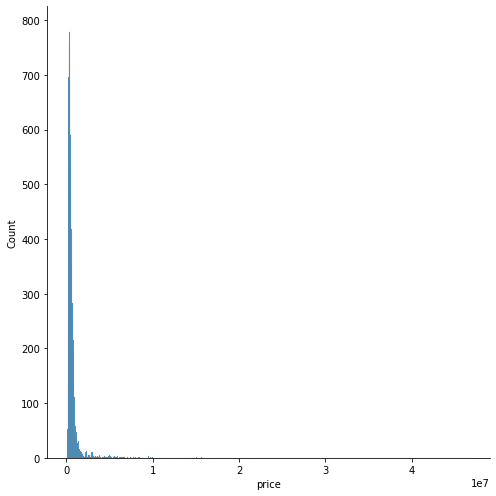

In [507]:
sns.displot(data, x='price', height=7)

In [508]:
data['price'] = np.log(data['price'])

C:\Users\HardWorkStation\AppData\Local\Temp\ipykernel_3456\4025759691.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



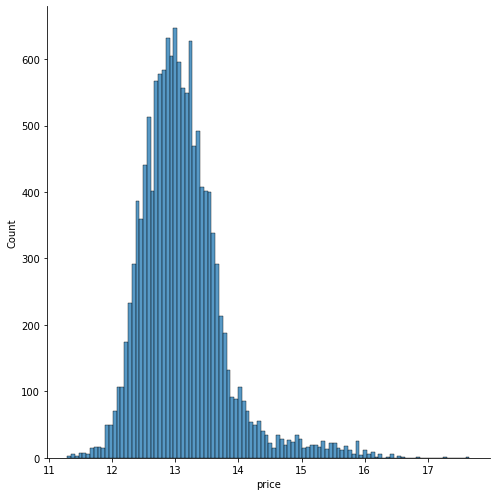

In [509]:
sns.displot(data, x='price', height=7)

<AxesSubplot:>

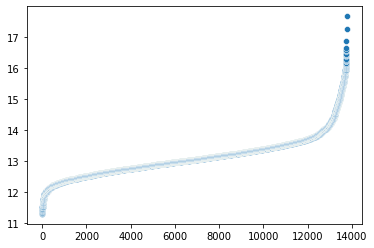

In [510]:
sns.scatterplot(x=range(len(data)), y=np.sort(data['price']))

Видим что данные распределены +- логнормально

In [511]:
data['price'].describe()

count    13763.000000
mean        13.113066
std          0.657628
min         11.289782
25%         12.691580
50%         13.031344
75%         13.415033
max         17.658826
Name: price, dtype: float64

### Рассмотрим распределение численных признаков

In [512]:
CONTINUES_COLS = [
    "price",
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "sqft_living15",
    "sqft_lot15"
]

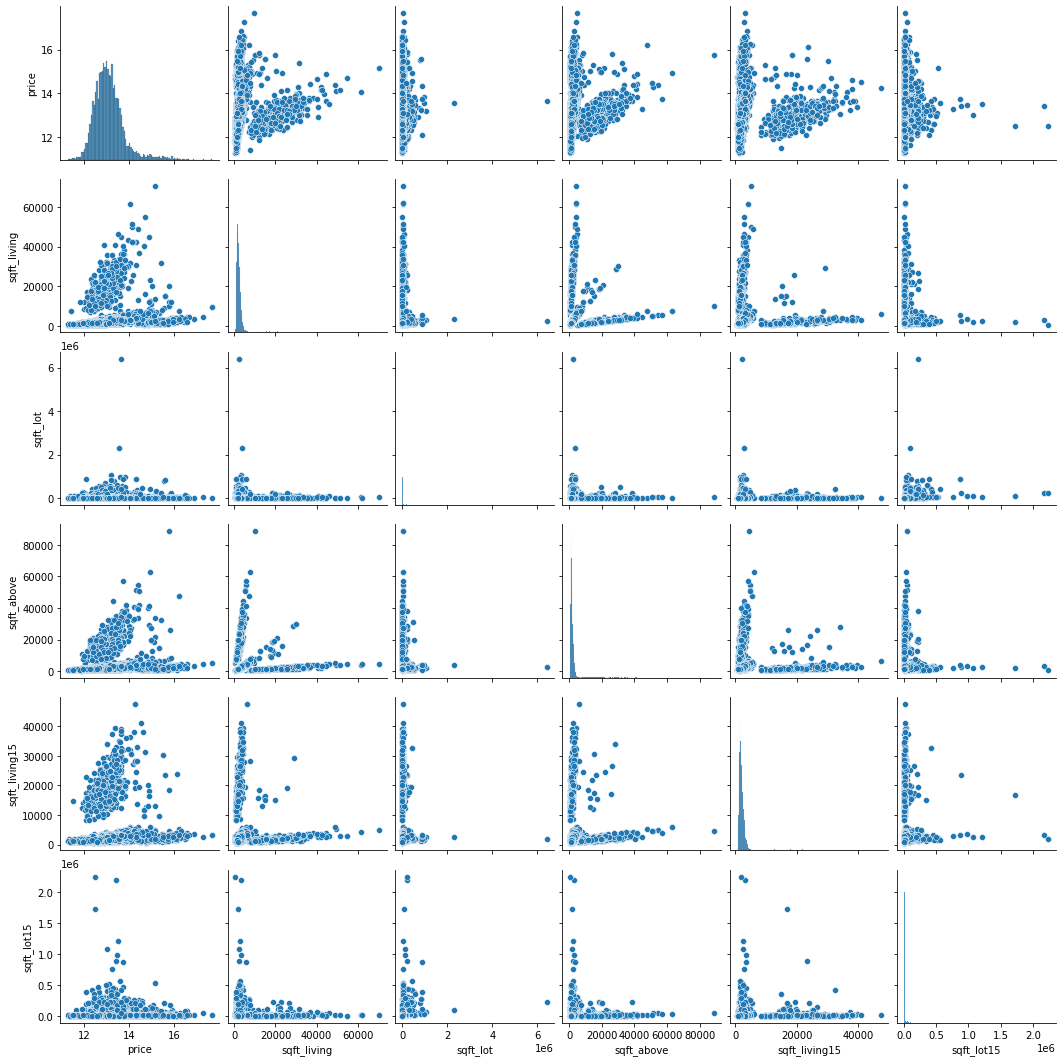

In [513]:
sns.pairplot(data[CONTINUES_COLS])

Кто видит странности? 

### Рассмотрим очевидную зависимость жилой площади и стоимости

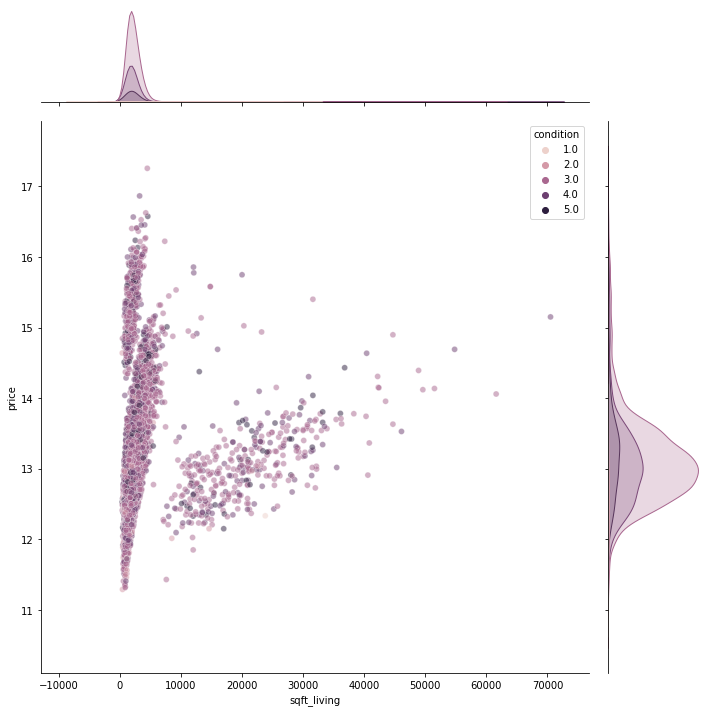

In [514]:
sns.jointplot(data=data, x='sqft_living', y='price', hue='condition', alpha = 0.5, height=10)

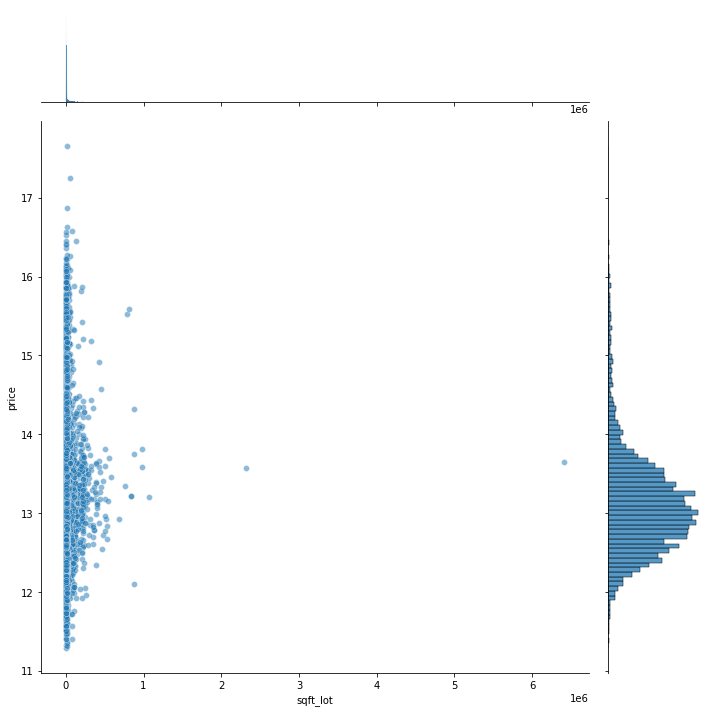

In [515]:
sns.jointplot(data=data, x='sqft_lot', y='price', alpha = 0.5, height=10)

Можем увидеть несколько кластеров для которых свойственен свой наклон линейной зависимости

### Посмотрим на распределения внутри категорий

Condition

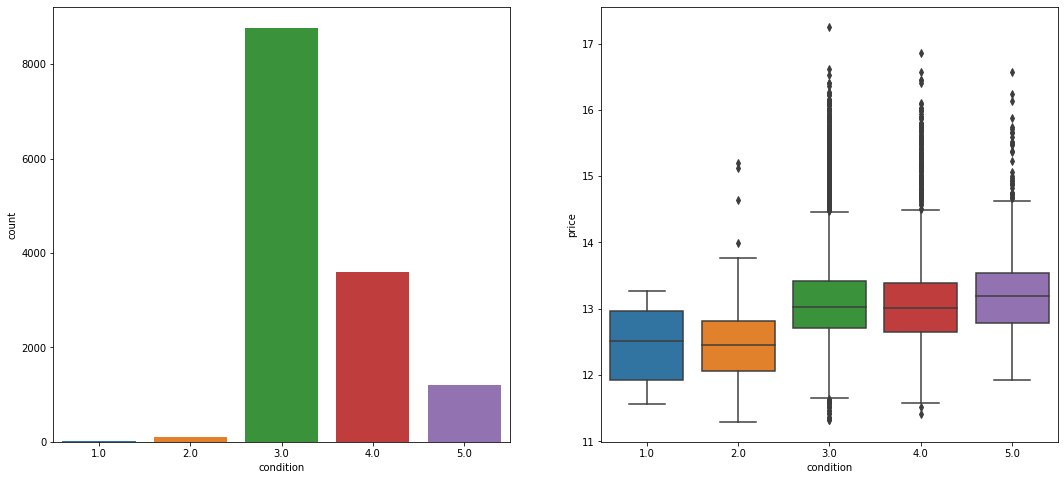

In [516]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='condition', data=data, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

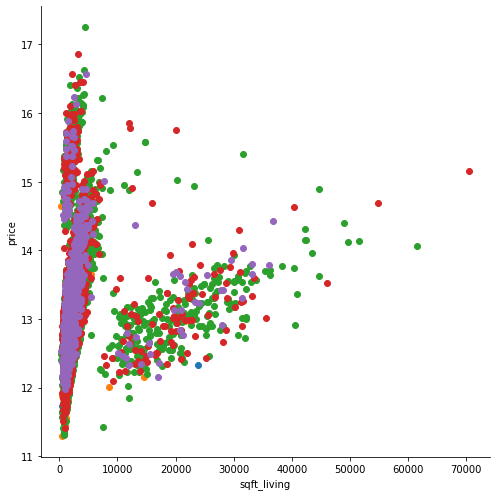

In [517]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='condition', height=7)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Bedrooms

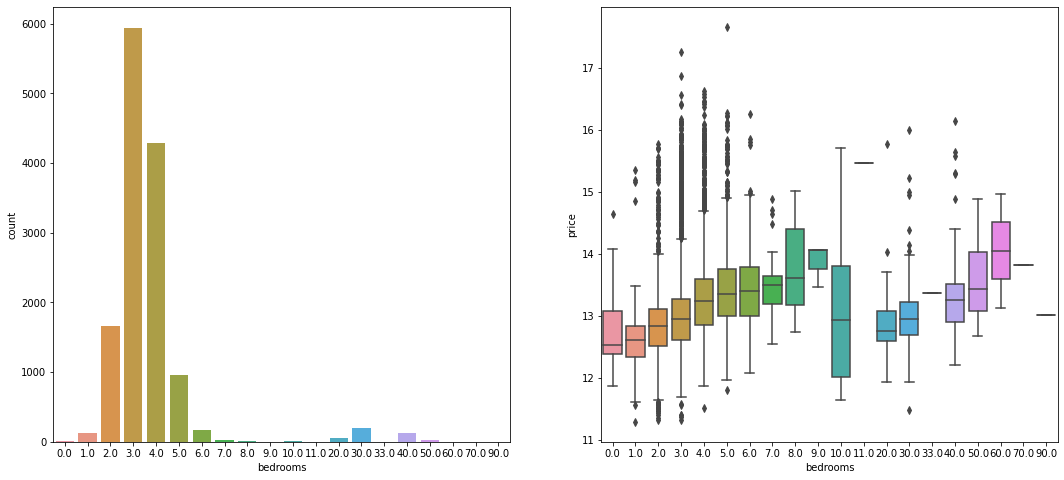

In [518]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bedrooms', data=data, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

In [519]:
data

id       date      price  bedrooms  bathrooms  sqft_living  \
1012   6378500230 2014-05-20  12.955127      40.0       1.75       1940.0   
1013   5104520150 2014-05-20  12.962195       4.0       2.50       2800.0   
1014   7702010030 2014-05-20  13.219490       3.0       2.50       2830.0   
1015   7247000035 2014-05-20  12.254863       4.0       1.75       2180.0   
1016   8562790760 2014-05-20  13.573439       NaN       3.50       3070.0   
...           ...        ...        ...       ...        ...          ...   
15124  9528104286 2015-01-13  13.028053       2.0       1.50      10200.0   
15125  8682261440 2015-01-13        NaN       2.0       1.75      15600.0   
15126  2767700022 2015-01-13  13.122363       3.0       3.25       1520.0   
15127  1939050110 2015-01-13  13.122363       3.0       2.25       1440.0   
15128  1352300520 2015-01-13  12.591335       3.0       3.00       1670.0   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1012     6909.0     1.0         0.0   0.0        4.0    7.0       970.0   
1013     8494.0     2.0         0.0   0.0        3.0    8.0      2800.0   
1014     5802.0     2.0         0.0   0.0        3.0    9.0     28300.0   
1015    28710.0     1.0         0.0   0.0        3.0    8.0      1180.0   
1016     4684.0     2.0         0.0   0.0        3.0   10.0         NaN   
...         ...     ...         ...   ...        ...    ...         ...   
15124    1146.0     3.0         0.0   0.0        3.0    7.0      1020.0   
15125    4500.0     1.0         0.0   0.0        3.0    8.0      1560.0   
15126    1500.0     3.0         0.0   0.0        3.0    7.0      1520.0   
15127   15661.0     1.0         0.0   0.0        3.0    8.0      1180.0   
15128    4120.0     1.5         0.0   0.0        3.0    7.0      1140.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1012           970.0    1941.0           0.0  98133.0  47.7108 -122.352   
1013             0.0    2004.0           0.0  98038.0  47.3521 -122.009   
1014             0.0    2001.0           0.0  98028.0  47.7605 -122.234   
1015          1000.0    1950.0           0.0  98198.0  47.4050 -122.288   
1016           880.0    2009.0           0.0  98027.0  47.5316 -122.076   
...              ...       ...           ...      ...      ...      ...   
15124            0.0    2001.0           0.0  98115.0  47.6774 -122.325   
15125            0.0    2004.0           0.0  98053.0  47.7128 -122.032   
15126            0.0    2000.0           0.0  98107.0  47.6700 -122.389   
15127          260.0    1988.0           0.0  98074.0  47.6225 -122.038   
15128          530.0    1929.0        2012.0  98055.0  47.4881 -122.199   

       sqft_living15  sqft_lot15  
1012          1460.0      6906.0  
1013             NaN      8494.0  
1014          2500.0      5788.0  
1015          2180.0     28710.0  
1016          2290.0      2664.0  
...              ...         ...  
15124         1138.0      1156.0  
15125         1860.0      4500.0  
15126         1520.0      1323.0  
15127         1440.0     13963.0  
15128         1010.0      4120.0  

[14117 rows x 21 columns]

In [520]:
data.loc[data['bedrooms'] == 0] = 1

C:\Users\HardWorkStation\AppData\Local\Temp\ipykernel_3456\1694608259.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [521]:
data['sqft_per_bedroom'] = (data['sqft_living'] / data['bedrooms'].fillna(1))

C:\Users\HardWorkStation\AppData\Local\Temp\ipykernel_3456\2049653802.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

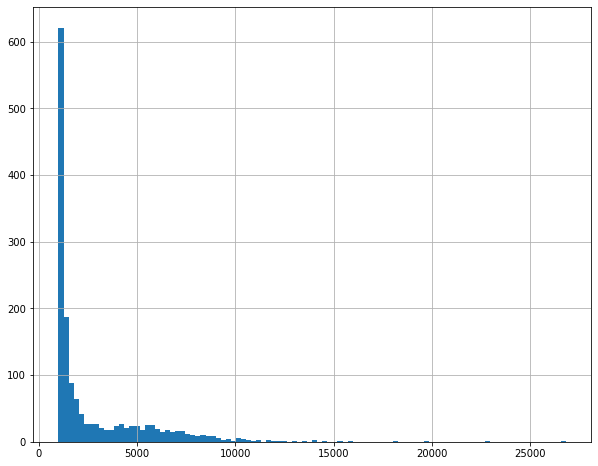

In [522]:
plt.figure(figsize=(10, 8))
data[data['sqft_per_bedroom'] > 1000]['sqft_per_bedroom'].hist(bins=100)

<AxesSubplot:>

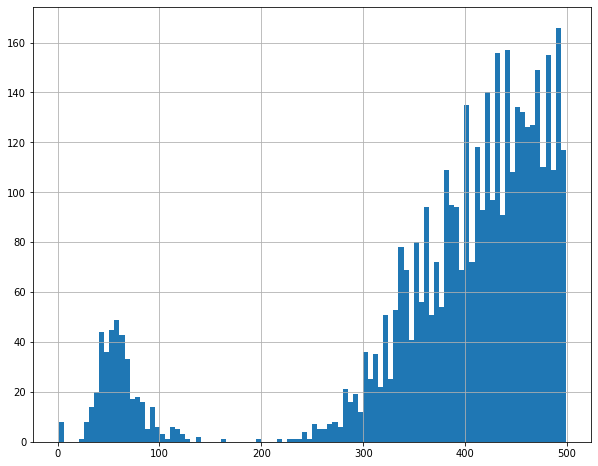

In [523]:
plt.figure(figsize=(10, 8))
data[data['sqft_per_bedroom'] < 500]['sqft_per_bedroom'].hist(bins=100)

In [524]:
(data['sqft_per_bedroom'] < 200).sum()

399

In [525]:
data = data[data['sqft_per_bedroom'] > 200]

In [526]:
data = data[data['bedrooms'] < 9]

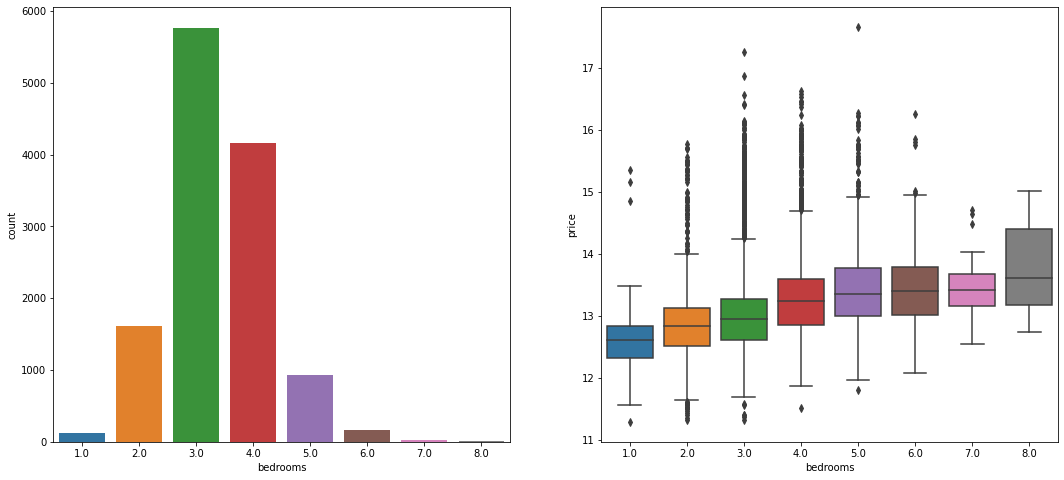

In [527]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bedrooms', data=data, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

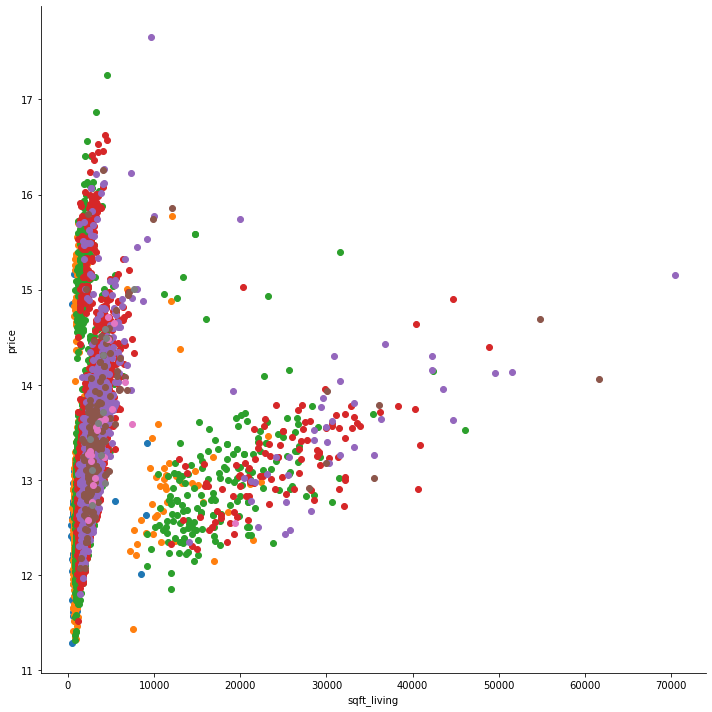

In [528]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bedrooms', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

View

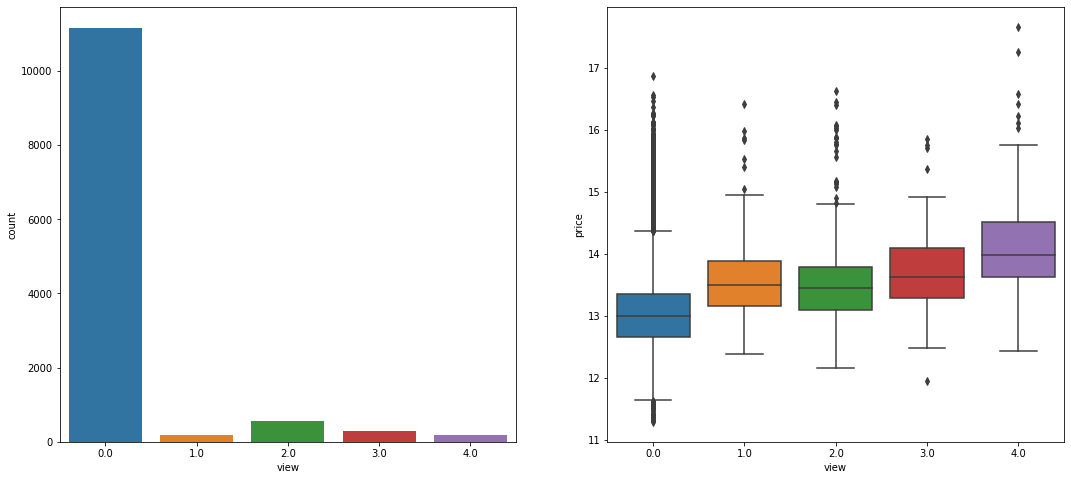

In [529]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='view', data=data, ax=ax[0])
sns.boxplot(x='view', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

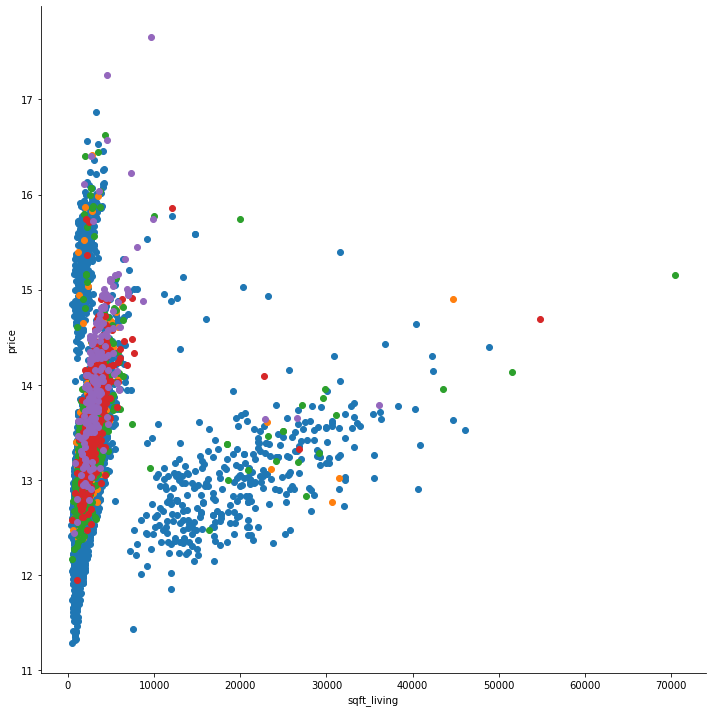

In [530]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='view', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Bathrooms

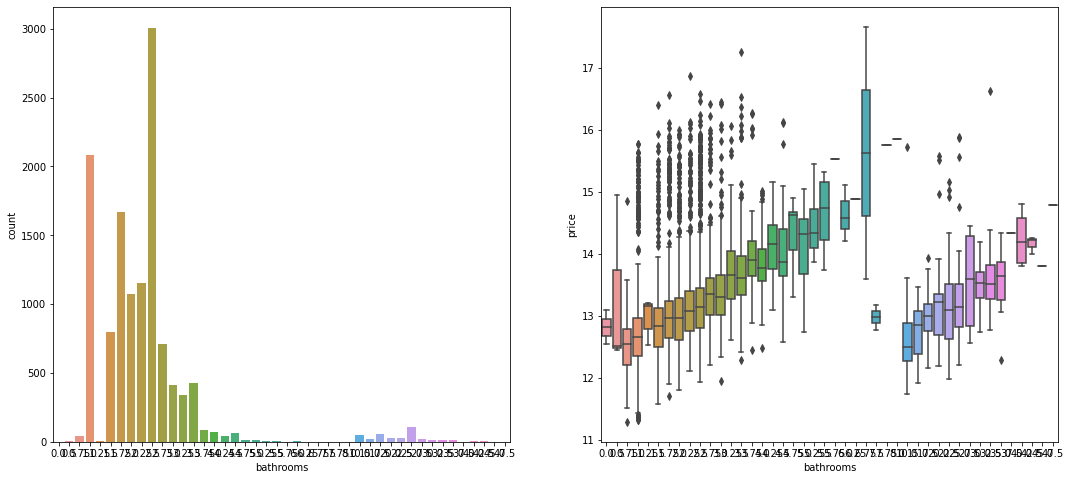

In [531]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bathrooms', data=data, ax=ax[0])
sns.boxplot(x='bathrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

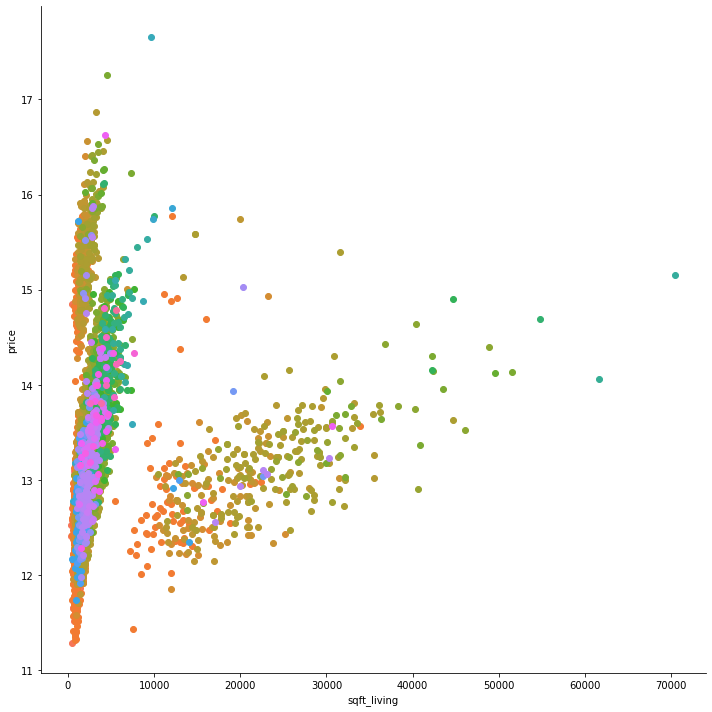

In [532]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bathrooms', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

In [533]:
data.loc[data['bathrooms'] == 0, 'bathrooms'] = 1

In [534]:
(data['bathrooms'] == 0).sum()

0

In [535]:
data['sqft_per_bedroom'] = (data['sqft_living'] / data['bathrooms'].fillna(1))

<AxesSubplot:>

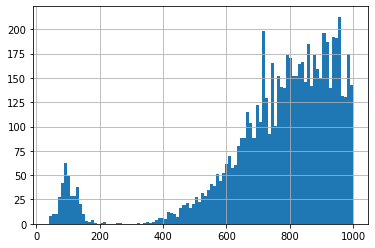

In [536]:
data[data['sqft_per_bedroom'] < 1000]['sqft_per_bedroom'].hist(bins=100)

In [537]:
data = data[data['sqft_per_bedroom'] > 300]

<AxesSubplot:>

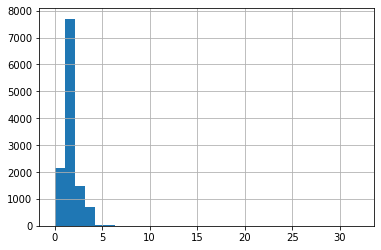

In [538]:
data['bathrooms'].round().hist(bins=30)

In [539]:
len(data[data['bathrooms'] > 7])

15

In [540]:
data = data[data['bathrooms'] < 7]

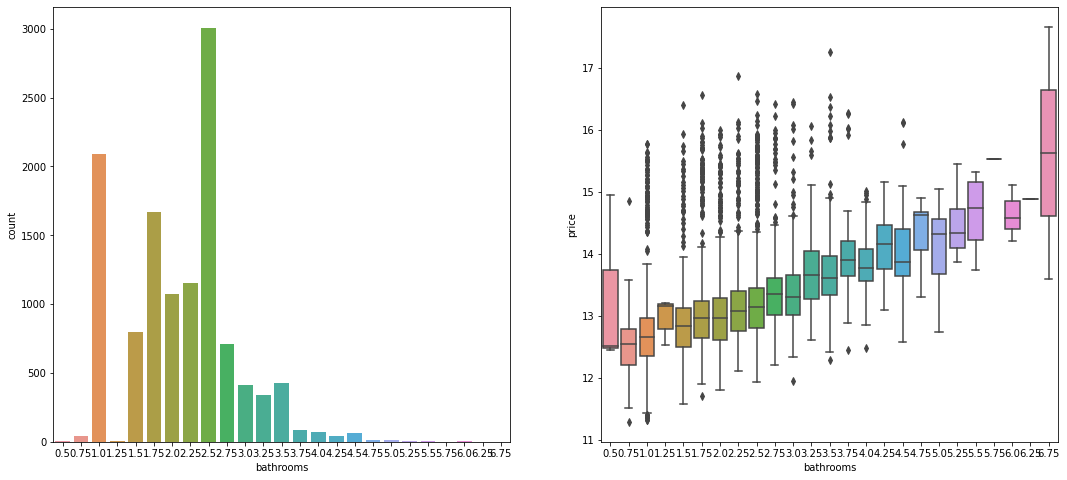

In [541]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bathrooms', data=data, ax=ax[0])
sns.boxplot(x='bathrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

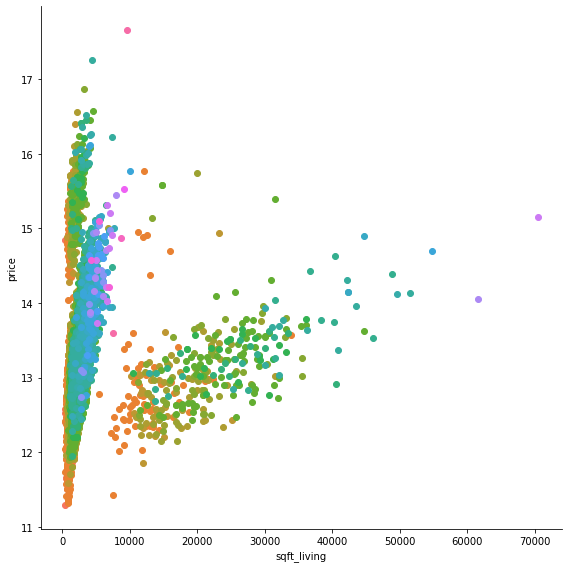

In [542]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bathrooms', height=8)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Floor

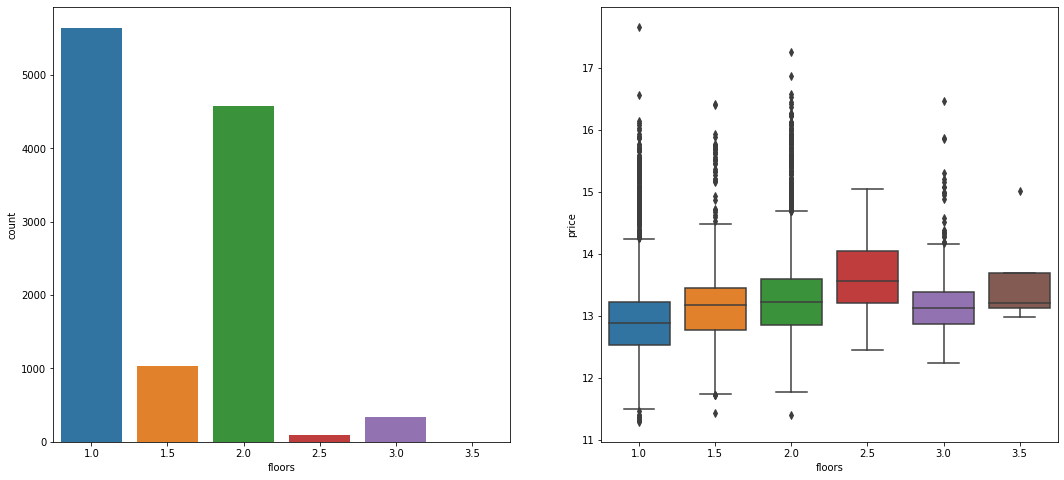

In [543]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='floors', data=data, ax=ax[0])
sns.boxplot(x='floors', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

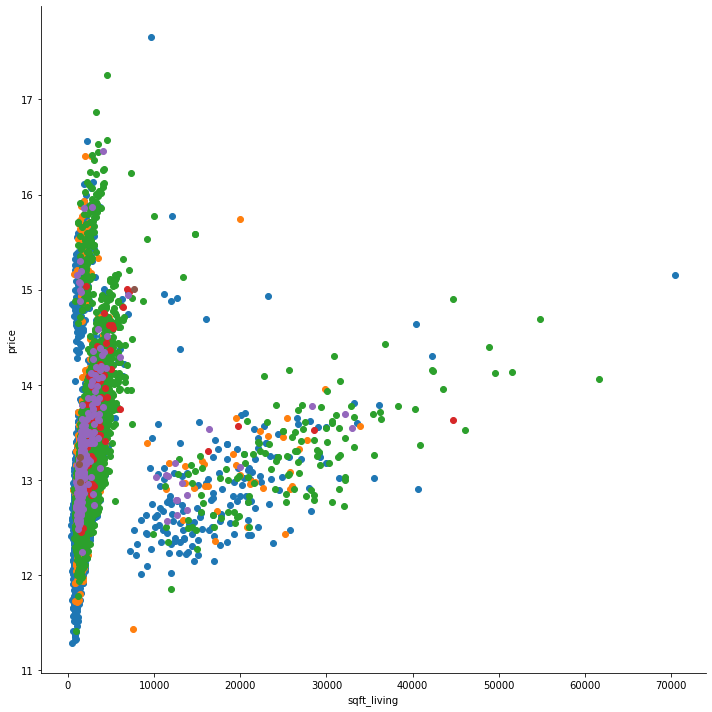

In [544]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='floors', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Grade

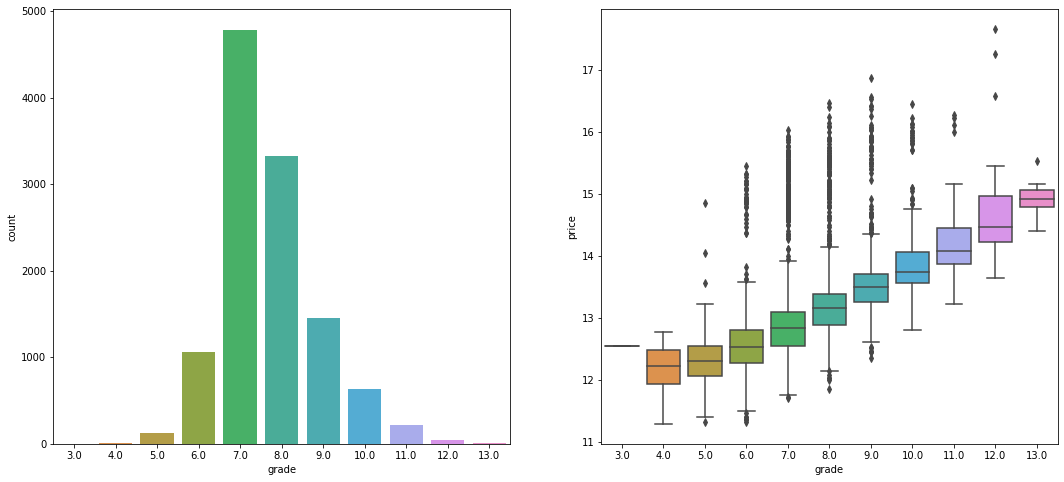

In [545]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='grade', data=data, ax=ax[0])
sns.boxplot(x='grade', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

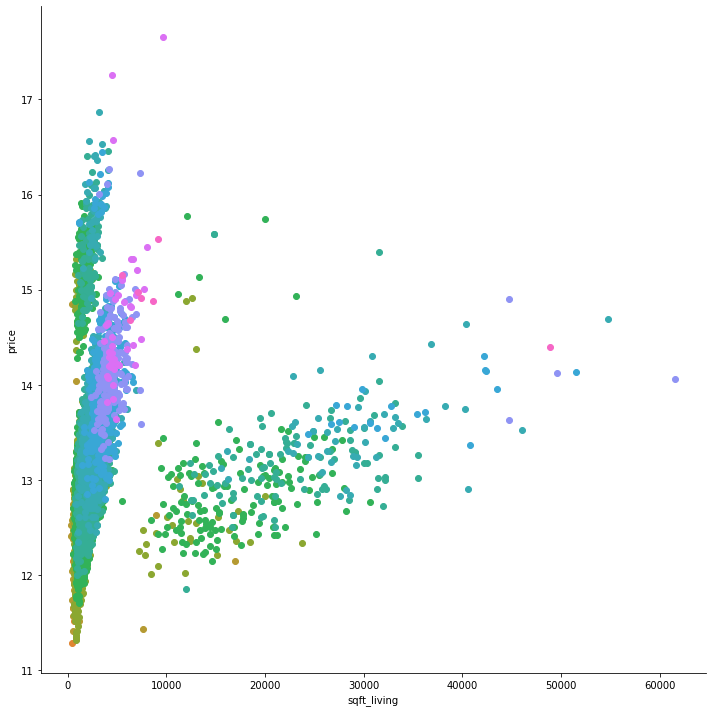

In [546]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='grade', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

In [547]:
data['sqft_living'] = np.log(data['sqft_living'])

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

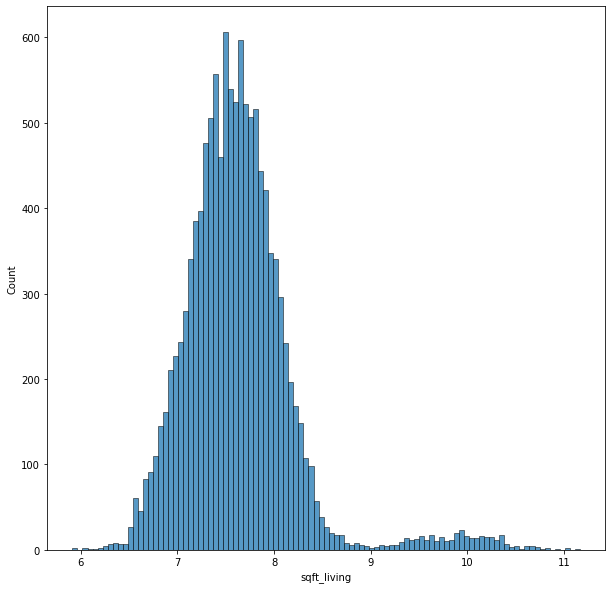

In [548]:
plt.figure(figsize=(10, 10))
sns.histplot(data, x='sqft_living',)

In [549]:
len(data[data['sqft_living'] > 9])

359

In [550]:
data = data[data['sqft_living'] < 9]

<Figure size 864x576 with 0 Axes>

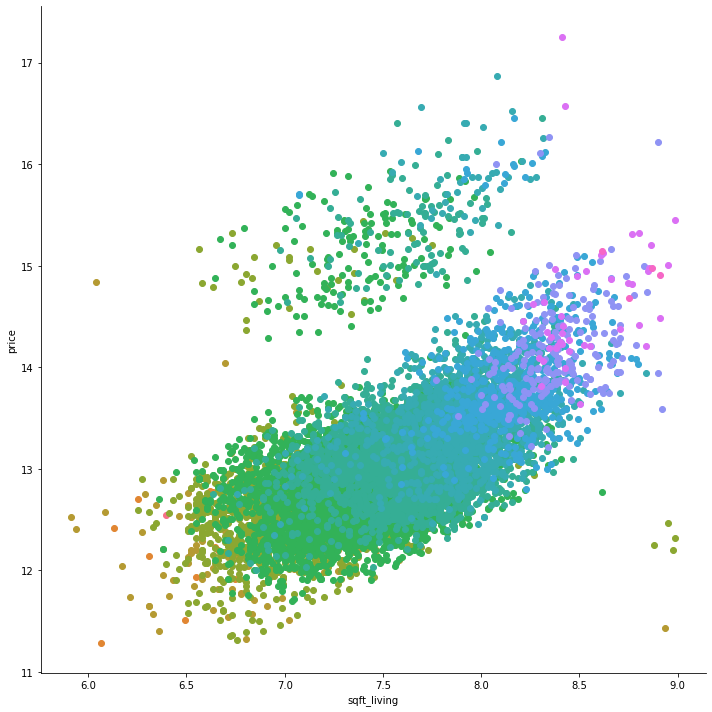

In [551]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='grade', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

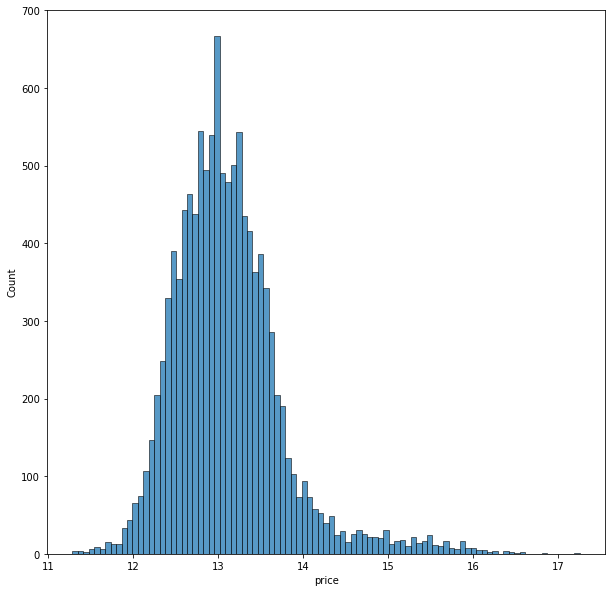

In [552]:
plt.figure(figsize=(10, 10))
sns.histplot(data, x='price',)

### Корреляции в категориях

In [553]:
bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bath[0]], data[bath[1]]).style.background_gradient(cmap = cm)

In [554]:
bath_cond = ['bathrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bath_cond[0]], data[bath_cond[1]]).style.background_gradient(cmap = cm)

In [555]:
bed_cond = ['bedrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bed_cond[0]], data[bed_cond[1]]).style.background_gradient(cmap = cm)

In [556]:
cond_water = ['condition', 'waterfront']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[cond_water[0]], data[cond_water[1]]).style.background_gradient(cmap = cm)

In [557]:
grade_cond = ['grade', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_cond[0]], data[grade_cond[1]]).style.background_gradient(cmap = cm)

In [558]:
grade_bed = ['grade', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_bed[0]], data[grade_bed[1]]).style.background_gradient(cmap = cm)

In [559]:
grade_bath = ['grade', 'bathrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_bath[0]], data[grade_bath[1]]).style.background_gradient(cmap = cm)

### Корреляция в вещественных

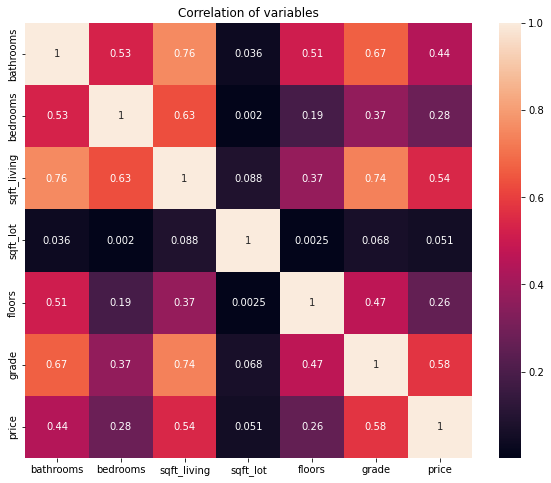

In [560]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

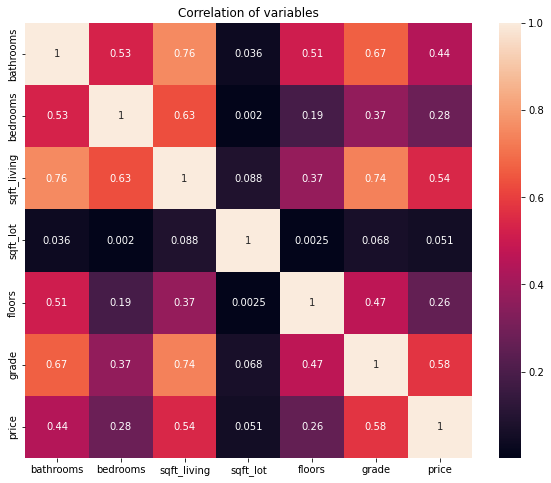

In [561]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

### Посмотрим на зависимости года постройки и цены

g:\practicum_ds\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='yr_built', ylabel='Density'>

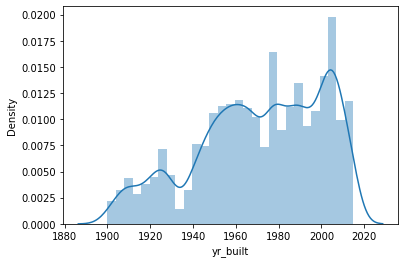

In [562]:
sns.distplot(data['yr_built'])

g:\practicum_ds\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

g:\practicum_ds\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



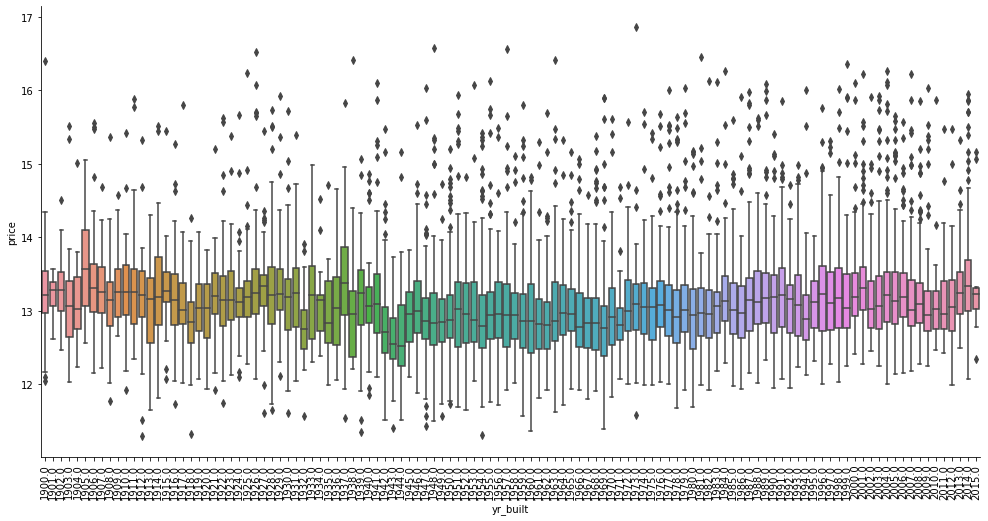

In [563]:
g = sns.factorplot(x="yr_built", y = "price", data=data[data['price'] < 1000000], 
                   size= 7, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

In [564]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11679 entries, 1013 to 15128
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11679 non-null  int64  
 1   date              11679 non-null  object 
 2   price             11448 non-null  float64
 3   bedrooms          11679 non-null  float64
 4   bathrooms         11679 non-null  float64
 5   sqft_living       11679 non-null  float64
 6   sqft_lot          11321 non-null  float64
 7   floors            11333 non-null  float64
 8   waterfront        11326 non-null  float64
 9   view              11327 non-null  float64
 10  condition         11320 non-null  float64
 11  grade             11326 non-null  float64
 12  sqft_above        11299 non-null  float64
 13  sqft_basement     11324 non-null  float64
 14  yr_built          11325 non-null  float64
 15  yr_renovated      11337 non-null  float64
 16  zipcode           11339 non-null  flo

### Д/З

Необходимо:
    
    1) Рассмотреть как выглядят данные до и после удаления выбросов, проанализировать как могут выбросы влиять на данные и совместные распределения
    2) В данных еще есть выбросы нужно их найти и избавиться от них (либо попробовать использовать)
    3) Придумать новые признаки (возраст здания и т.п. для дальнейшего обучения модели)
    4) Создать эти признаки для тестовой выборки на основе трейновой
    5) Обучить на этих данных модель сравнить с качеством бейзлайна
    6) Подобрать параметры и оценить насколько удалось улучшить качество за счет подбора параметров


In [91]:
data = pd.read_csv('train.csv')

CONTINUES_COLS = [
    "price",
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "sqft_living15",
    "sqft_lot15"
]

#### Вспомним описание данных

date: Date house was sold (Дата продажи участка)
price: Price of the sold house (Цена продажи)
bedrooms: Number of Bedrooms (Число спален)
bathrooms: Number of bathrooms (Число ванных комнат)
sqft_living: Square footage of the living space (жилая площадь)
sqrt_lot: Square footage of the lot (общая площадь)
floors: Total floors in the house (кол-во этажей в доме)
waterfront: Whether the house is on a waterfront(1: yes, 0: no) (дом на набережной?)
view: special view? (вид из окна)
condition: Condition of the house (Состояние здания)
grade: unknown
sqft_above: Square footage of house apart from basement (Площадь здания без подвала)
sqft_basement: Square footage of the basement (Площадь подвала)
yr_built: Built year (Год постройки)
yr_renovated: Year when the house was renovated (Год реновации)
zipcode: zipcode of the house (Индекс здания)
lat: Latitude coordinate (Широта)
long Longitude coordinate (Долгота)
sqft_living15: Living room area in 2015(implies some renovations) (после реновации)
sqrt_lot15: Lot area in 2015(implies some renovations) (после реновации)

### Задание 1 и 2. Избавимся от выбросов и рассмотрим как выглядят данные до и после удаления выбросов, проанализировать как могут выбросы влиять на данные и совместные распределения

Посмотрим какие у нас еще остались возможные выбросы и аномалии

In [92]:
# вспомним что за данные у нас вообще есть
data.head()

id             date  price  bedrooms  bathrooms  sqft_living  \
0  5561000190  20140502T000000    NaN       NaN        NaN          NaN   
1  2207200675  20140502T000000    NaN       NaN        NaN          NaN   
2  3390600010  20140502T000000    NaN       NaN        NaN          NaN   
3  7525000080  20140502T000000    NaN       NaN        NaN          NaN   
4  5072200040  20140502T000000    NaN       NaN        NaN          NaN   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0       NaN     2.0         0.0   0.0        4.0    9.0         NaN   
1       NaN     1.0         0.0   0.0        4.0    7.0         NaN   
2       NaN     1.0         0.0   0.0        4.0    7.0         NaN   
3       NaN     1.0         0.0   0.0        3.0    8.0         NaN   
4       NaN     1.0         0.0   2.0        5.0    8.0         NaN   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0    1977.0           0.0  98027.0  47.4635 -121.991   
1            0.0    1956.0           0.0  98007.0  47.6022 -122.134   
2            0.0    1955.0           0.0  98106.0  47.5334 -122.365   
3          360.0    1980.0           0.0  98074.0  47.6267 -122.046   
4          310.0    1957.0           0.0  98166.0  47.4419 -122.340   

   sqft_living15  sqft_lot15  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN

In [93]:
(data["sqft_basement"] / data["sqft_lot"])\
    .value_counts()\
    .reset_index()\
    .sort_values(by='index', ascending=False)\
    .rename({'index':'basement_area_increase', 0:'count'}, axis=1)\
    .query('basement_area_increase > 0.3')

basement_area_increase  count
566                 0.737179      1
4171                0.627208      1
351                 0.600000      2
930                 0.592075      1
792                 0.574468      1
...                      ...    ...
44                  0.303030      4
2112                0.302778      1
512                 0.302362      1
2552                0.301612      1
4505                0.301389      1

[133 rows x 2 columns]

Есть 117 объектов, где площадь подвала больше общей площади объекта более чем на 30%. А есть объекты, где даже более чем на 60%. Выбросы? Аномалии? Я бы уточнил у поставщика данных. А пока не будем считать это каким-то выбросом и удалять их не будем.


In [94]:
(data["sqft_lot15"] / data["sqft_lot"])\
    .value_counts()\
    .reset_index()\
    .sort_values(by='index', ascending=False)\
    .rename({'index':'lot_area_increase', 0:'count'}, axis=1)\
    .query('lot_area_increase > 2')

lot_area_increase  count
4903          80.321285      1
870           33.707865      1
9266          30.851064      1
2290          27.908352      1
8569          27.533765      1
...                 ...    ...
8267           2.007160      1
4748           2.003183      1
3049           2.002662      1
1569           2.001601      1
5410           2.000185      1

[530 rows x 2 columns]

Вот так реновация! В 447 случаях общая площадь увеличилась более чем в 2 раза, а где-то и почти в 34! Этот вопрос я бы также уточнил у поставщика. Пока не удаляем.

In [95]:
#sns.pairplot(data[CONTINUES_COLS], hue='price')

In [96]:
for col in CONTINUES_COLS:
    high_quantile = 0.95
    filtered_count = len(data[data[col] > data[col].quantile(high_quantile)])
    len_data = len(data)
    # отфильртуем все, что больше 0,95 квантиля
    print(f"В колонке {col} отфильтруем {filtered_count} значений, что составляет {filtered_count / len_data:.02f}% от датасета")
    data[col] = data[data[col] < data[col].quantile(high_quantile)][col]

В колонке price отфильтруем 689 значений, что составляет 0.05% от датасета
В колонке sqft_living отфильтруем 678 значений, что составляет 0.04% от датасета
В колонке sqft_lot отфильтруем 681 значений, что составляет 0.05% от датасета
В колонке sqft_above отфильтруем 675 значений, что составляет 0.04% от датасета
В колонке sqft_living15 отфильтруем 679 значений, что составляет 0.04% от датасета
В колонке sqft_lot15 отфильтруем 680 значений, что составляет 0.04% от датасета


In [97]:
#sns.pairplot(data[CONTINUES_COLS], hue='price')

### Выводы

После того как мы избавились от выбросов, наши данные приобрели "объем" при построении графиков совместных распределений и теперь можно более наглядно разглядеть или оценить зависимости.


### Задание 3. Придумать новые признаки (возраст здания и т.п. для дальнейшего обучения модели)

Сначала думал определить расстояния между объектами по формуле определения расстояния между объектами по координатам [отсюда](https://gis-lab.info/qa/great-circles.html#.D0.A0.D0.B5.D0.B0.D0.BB.D0.B8.D0.B7.D0.B0.D1.86.D0.B8.D1.8F_.D0.BD.D0.B0_.D1.8F.D0.B7.D1.8B.D0.BA.D0.B5_Python), но потом понял что мне это сейчас скорее всего не пригодится, но функцию оставил, вдруг пригодится в будущем. А может быть и не только мне :)

In [98]:
import math

def get_distance(llat1, llong1, llat2, llong2):
    #rad - радиус сферы (Земли)
    rad = 6372795

    # #координаты двух точек
    # llat1 = 77.1539
    # llong1 = -120.398
    #
    # llat2 = 77.1804
    # llong2 = 129.55

    #в радианах
    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.

    #косинусы и синусы широт и разницы долгот
    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)

    #вычисления длины большого круга
    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)
    dist = ad*rad

    #вычисление начального азимута
    # x = (cl1*sl2) - (sl1*cl2*cdelta)
    # y = sdelta*cl2
    # z = math.degrees(math.atan(-y/x))
    #
    # if x < 0:
    #     z = z+180.
    #
    # z2 = (z+180.) % 360. - 180.
    # z2 = - math.radians(z2)
    # anglerad2 = z2 - ((2*math.pi)*math.floor((z2/(2*math.pi))) )
    # angledeg = (anglerad2*180.)/math.pi

    # print('Distance >> %.0f' % dist, ' [meters]')
    # print('Initial bearing >> ', angledeg, '[degrees]')

    return dist

Для начала избавимся от пропусков

In [99]:
data.isna().sum()

id                  0
date                0
price            2055
bedrooms         1514
bathrooms        1513
sqft_living      2193
sqft_lot         2192
floors            446
waterfront        452
view              434
condition         473
grade             463
sqft_above       2240
sqft_basement     467
yr_built          450
yr_renovated      452
zipcode           437
lat               447
long              447
sqft_living15    2203
sqft_lot15       2192
dtype: int64

У нас много пропусков в достаточно важных (на первый взгляд) метриках и в целевой метрике. Заполнять пропуски в целевой метрике имхо не самая удачная идея т.к. модель на этих данных будет учиться, а заполняем мы с довольно высоким риском (а скорее всего и долей) ошибки. Поэтому удалим пропуски в целевой метрике и посмотрим что останется.

In [100]:
data = data.dropna(subset=['price'])
data.isna().sum()

id                  0
date                0
price               0
bedrooms          395
bathrooms         391
sqft_living       913
sqft_lot         1027
floors            384
waterfront        381
view              381
condition         412
grade             394
sqft_above        984
sqft_basement     407
yr_built          379
yr_renovated      394
zipcode           380
lat               382
long              387
sqft_living15     965
sqft_lot15       1008
dtype: int64

Кластеризуем объекты по координатам

In [101]:
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from catboost import CatBoostRegressor

In [102]:
imputer = KNNImputer(n_neighbors=5)
print(f"Before impute: \n {data[CONTINUES_COLS].isna().sum()}")
data_new = pd.DataFrame(imputer.fit_transform(data[CONTINUES_COLS]), columns=CONTINUES_COLS)
print(f"After impute: {data_new.isna().sum()}")

Before impute: 
 price               0
sqft_living       913
sqft_lot         1027
sqft_above        984
sqft_living15     965
sqft_lot15       1008
dtype: int64
After impute: price            0
sqft_living      0
sqft_lot         0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64


Посмотрим как сейчас располагаются наши объекты

In [103]:
data[CONTINUES_COLS]

price  sqft_living  sqft_lot  sqft_above  sqft_living15  sqft_lot15
1012   423000.0       1940.0    6909.0       970.0         1460.0      6906.0
1013   426000.0       2800.0    8494.0      2800.0            NaN      8494.0
1014   551000.0       2830.0    5802.0         NaN         2500.0      5788.0
1015   210000.0       2180.0   28710.0      1180.0         2180.0     28710.0
1016   785000.0       3070.0    4684.0         NaN         2290.0      2664.0
...         ...          ...       ...         ...            ...         ...
15123  314000.0       1900.0    8200.0      1900.0         1620.0      8200.0
15124  455000.0          NaN    1146.0      1020.0         1138.0      1156.0
15126  500000.0       1520.0    1500.0      1520.0         1520.0      1323.0
15127  500000.0       1440.0   15661.0      1180.0         1440.0     13963.0
15128  294000.0       1670.0    4120.0      1140.0         1010.0      4120.0

[13074 rows x 6 columns]

In [104]:
data_new[CONTINUES_COLS]

price  sqft_living  sqft_lot  sqft_above  sqft_living15  sqft_lot15
0      423000.0       1940.0    6909.0       970.0         1460.0      6906.0
1      426000.0       2800.0    8494.0      2800.0         2108.4      8494.0
2      551000.0       2830.0    5802.0      2554.0         2500.0      5788.0
3      210000.0       2180.0   28710.0      1180.0         2180.0     28710.0
4      785000.0       3070.0    4684.0      1996.0         2290.0      2664.0
...         ...          ...       ...         ...            ...         ...
13069  314000.0       1900.0    8200.0      1900.0         1620.0      8200.0
13070  455000.0       1294.0    1146.0      1020.0         1138.0      1156.0
13071  500000.0       1520.0    1500.0      1520.0         1520.0      1323.0
13072  500000.0       1440.0   15661.0      1180.0         1440.0     13963.0
13073  294000.0       1670.0    4120.0      1140.0         1010.0      4120.0

[13074 rows x 6 columns]

In [105]:
x_axis = data['long']
y_axis = data['lat']

px.scatter(x=x_axis, y=y_axis).show()

Видим несколько явных кластеров, некоторые явно очень отдаленные объекты и большие кучи данных) Попробуем это разобрать по кластерам с помощью KMeans

In [106]:
# KMeans чувствовтелен к пропускам, поэтому удалим даныне с пропущенными гео координатами
data = data.dropna(subset=['lat', 'long'])

Самое время отделить трейн от теста

In [107]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
1012  6378500230  20140520T000000  423000.0      40.0       1.75       1940.0   
1013  5104520150  20140520T000000  426000.0       4.0       2.50       2800.0   
1014  7702010030  20140520T000000  551000.0       3.0       2.50       2830.0   
1015  7247000035  20140520T000000  210000.0       4.0       1.75       2180.0   
1016  8562790760  20140520T000000  785000.0       NaN       3.50       3070.0   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1012    6909.0     1.0         0.0   0.0        4.0    7.0       970.0   
1013    8494.0     2.0         0.0   0.0        3.0    8.0      2800.0   
1014    5802.0     2.0         0.0   0.0        3.0    9.0         NaN   
1015   28710.0     1.0         0.0   0.0        3.0    8.0      1180.0   
1016    4684.0     2.0         0.0   0.0        3.0   10.0         NaN   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1012          970.0    1941.0           0.0  98133.0  47.7108 -122.352   
1013            0.0    2004.0           0.0  98038.0  47.3521 -122.009   
1014            0.0    2001.0           0.0  98028.0  47.7605 -122.234   
1015         1000.0    1950.0           0.0  98198.0  47.4050 -122.288   
1016          880.0    2009.0           0.0  98027.0  47.5316 -122.076   

      sqft_living15  sqft_lot15  
1012         1460.0      6906.0  
1013            NaN      8494.0  
1014         2500.0      5788.0  
1015         2180.0     28710.0  
1016         2290.0      2664.0

In [108]:
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

# удалим бесполезные для обучения фичи
data = data.drop(['id', 'date'], axis=1)
# отделим фичи от таргета
features = data.drop('price', axis=1)
target = data['price']


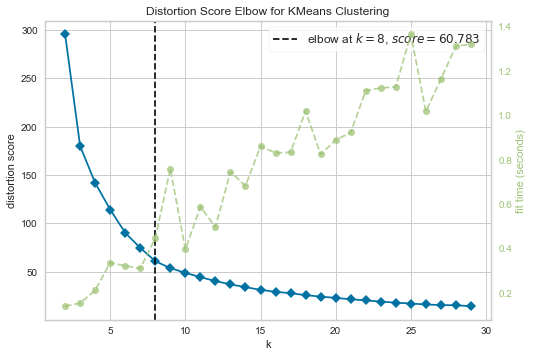

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [122]:
kmean = KMeans()
visualiser = KElbowVisualizer(kmean, k=(2, 30))
visualiser.fit(data[['long', 'lat']])
visualiser.show()


In [123]:
visualiser.elbow_value_

8

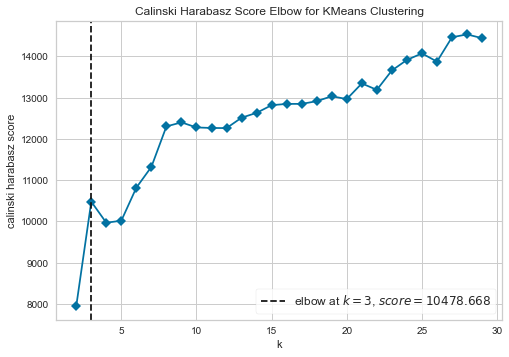

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [124]:
visualizer_ch = KElbowVisualizer(kmean, k=(2,30), metric='calinski_harabasz', timings=False)
visualizer_ch.fit(data[['long', 'lat']])
visualizer_ch.show()

In [126]:
visualizer_ch.elbow_value_ = 8

In [109]:
# разделим датасет
X_baseline_train, X_baseline_test, y_baseline, y_baseline_test = train_test_split(features.fillna(features.mean()), target.fillna(target.mean()), test_size=.25, random_state=25)

In [110]:
# оценивал чисто визуально, показалось наиболее точно при 30 кластерах
model = make_pipeline(StandardScaler(), KMeans(n_clusters=30))
model.fit(X_baseline_train[['long', 'lat']])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=30))])

In [111]:
preds = model.predict(X_baseline_train[['long', 'lat']])
x_axis = X_baseline_train['long']
y_axis = X_baseline_train['lat']
px.scatter(x=x_axis, y=y_axis, color=preds).show()

Ну, предположим, что такое разбиение имеет место быть) Посмотрим как это сказывается на целевой метрике

In [112]:
px.box(x=preds, y=y_baseline, title='Боксы цен по классам из KMeans').show()

Цена между многими классами и правда довольно резко отличается, имеется не большое количество выбросов, думаю это может быть хороший признак для модели. Добавим в фичи трейн и тест.

In [113]:
# приаттачим классификацию к трейну
X_baseline_train['geo_class'] = preds
# и к тесту
X_baseline_test['geo_class'] = model.predict(X_baseline_test[['long', 'lat']])

Повторим шаги из бейзлайна

In [114]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_baseline_train)
X_test = scaler.transform(X_baseline_train)

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# X_baseline_train = X_baseline_train.fillna(X_baseline_train.median())
# y_baseline = y_baseline.fillna(y_baseline.median())
#
# X_baseline_test = X_test.fillna(X_test.mean())
# y_baseline_test = y_baseline_test.fillna(y_baseline_test.mean())

lr = LinearRegression()
lr.fit(X_baseline_train, y_baseline)
print(r2_score(y_baseline_test, lr.predict(X_baseline_test)))


0.7048760521963402


In [116]:
feat_importances = pd.Series(lr.coef_, index=X_baseline_train.columns).sort_values(ascending=False)
fig = px.bar(feat_importances, title='Наиболее значимые признаки для линейной регрессии')
fig.update_layout(
    showlegend=False
)
fig.show()

Ого! После очистки от выбросов и введения одного нового признака модель дает R2 = 0.74, при дефолтном бейслайне R2 = 0.11. А больше всего, как ни странно, на результат повлияла широта :D

Попробуем модель помощнее и подберем для нее параметры :)

In [117]:
X_baseline_train

bedrooms  bathrooms  sqft_living      sqft_lot  floors  waterfront  \
2409        3.0   2.500000  1800.000000   5001.000000     2.0         0.0   
1053        3.0   1.750000  1140.000000   9628.000000     1.0         0.0   
2180        3.0   1.500000  1900.000000   9834.648085     1.5         0.0   
12739      40.0   2.500000  2890.000000   7306.000000     2.0         0.0   
5355        3.0   1.500000  1560.000000   9600.000000     1.0         0.0   
...         ...        ...          ...           ...     ...         ...   
10707       2.0   1.500000   830.000000   1325.000000     2.0         0.0   
4462        4.0   2.250000  2570.000000   9834.648085     2.0         0.0   
12917       2.0   1.750000  1280.000000  37373.000000     1.0         0.0   
8642        5.0   2.000000  2004.394585   8316.000000     1.0         0.0   
10779       3.0   2.645057  1420.000000   7520.000000     1.0         0.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  \
2409    0.0        3.0    7.0      1800.0            0.0    1996.0   
1053    0.0        4.0    7.0      1140.0            0.0    1969.0   
2180    0.0        3.0    7.0      1640.0          260.0    1926.0   
12739   0.0        3.0    7.0      2890.0            0.0    2006.0   
5355    0.0        4.0    7.0      1560.0            0.0    1961.0   
...     ...        ...    ...         ...            ...       ...   
10707   0.0        3.0    7.0       830.0            0.0    2005.0   
4462    0.0        3.0    8.0      2570.0            0.0    1980.0   
12917   0.0        4.0    7.0      1280.0            0.0    1996.0   
8642    0.0        3.0    7.0      1390.0          800.0    1961.0   
10779   0.0        4.0    7.0      1420.0            0.0    1956.0   

       yr_renovated       zipcode      lat     long  sqft_living15  \
2409            0.0  98034.000000  47.7126 -122.231         2106.0   
1053            0.0  98023.000000  47.2933 -122.372         1510.0   
2180            0.0  98115.000000  47.6779 -122.294         2090.0   
12739           0.0  98065.000000  47.5447 -121.883         2850.0   
5355            0.0  98033.000000  47.6918 -122.163         1520.0   
...             ...           ...      ...      ...            ...   
10707           0.0  98136.000000  47.5472 -122.384         1310.0   
4462            0.0  98011.000000  47.7640 -122.167         1950.0   
12917           0.0  98022.000000  47.2631 -122.019         2180.0   
8642            0.0  98108.000000  47.5488 -122.298         2010.0   
10779           0.0  98078.004932  47.6010 -122.134         2000.0   

         sqft_lot15  geo_class  
2409    5618.000000         17  
1053    9633.000000          3  
2180    5000.000000          0  
12739   6687.000000          5  
5355   10000.000000         19  
...             ...        ...  
10707   1485.000000         22  
4462    9600.000000         17  
12917  48351.000000         16  
8642    8316.000000          4  
10779   9194.989707          2  

[9236 rows x 19 columns]

In [118]:
from catboost import CatBoostRegressor
# from sklearn.model_selection import RandomizedSearchCV

X, X_test, y, y_test = train_test_split(features, target, test_size=.25, random_state=25)

params = dict(
    depth=[3,5,6,8, 10],
    nan_mode=['Min', 'Max'],
    n_estimators=[100, 200, 300, 400, 500]
)

cbr = CatBoostRegressor(random_state=25, thread_count=-1)
cbr.randomized_search(params, X, y, cv=3, n_iter=10)

0:	learn: 548894.7202752	test: 554600.0832130	best: 554600.0832130 (0)	total: 4.25ms	remaining: 1.7s
1:	learn: 534220.3792982	test: 539894.4993518	best: 539894.4993518 (1)	total: 7.24ms	remaining: 1.44s
2:	learn: 520428.9622037	test: 526154.3061746	best: 526154.3061746 (2)	total: 9.34ms	remaining: 1.24s
3:	learn: 507141.1954489	test: 512936.6062004	best: 512936.6062004 (3)	total: 11.9ms	remaining: 1.18s
4:	learn: 493835.6718118	test: 499605.0137307	best: 499605.0137307 (4)	total: 14ms	remaining: 1.1s
5:	learn: 481026.3891694	test: 486764.5785248	best: 486764.5785248 (5)	total: 16.1ms	remaining: 1.06s
6:	learn: 468561.3764208	test: 474251.4983478	best: 474251.4983478 (6)	total: 17.8ms	remaining: 1000ms
7:	learn: 456758.5896075	test: 462434.5202059	best: 462434.5202059 (7)	total: 19.6ms	remaining: 961ms
8:	learn: 445227.5701521	test: 450867.4624758	best: 450867.4624758 (8)	total: 25.1ms	remaining: 1.09s
9:	learn: 434514.5686321	test: 440133.7413195	best: 440133.7413195 (9)	total: 27ms	re

{'params': {'depth': 6, 'iterations': 500, 'nan_mode': 'Max'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
       

In [119]:
print(r2_score(y_test, cbr.predict(X_test)))

0.8897964637793712


Целевая метрика улучшилась еще на 15 пунктов. Catboost знает свое дело :)

In [120]:
feat_importances = pd.Series(cbr.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = px.bar(feat_importances, title='Наиболее значимые признаки для линейной регрессии')
fig.update_layout(
    showlegend=False
)
fig.show()

In [121]:
cbr2 = CatBoostRegressor(random_state=25, thread_count=-1)
cbr2.fit(X, y)

print(r2_score(y_test, cbr2.predict(X_test)))

Learning rate set to 0.058174
0:	learn: 245685.6744045	total: 8.05ms	remaining: 8.05s
1:	learn: 237443.8892902	total: 12.6ms	remaining: 6.29s
2:	learn: 229702.0037019	total: 16.8ms	remaining: 5.57s
3:	learn: 221946.4376180	total: 21.3ms	remaining: 5.3s
4:	learn: 214947.8164746	total: 25.7ms	remaining: 5.12s
5:	learn: 208571.5366614	total: 30.7ms	remaining: 5.09s
6:	learn: 202315.7808572	total: 38.8ms	remaining: 5.51s
7:	learn: 196817.0640354	total: 44ms	remaining: 5.46s
8:	learn: 191321.3773498	total: 48.1ms	remaining: 5.3s
9:	learn: 186118.3197314	total: 52.3ms	remaining: 5.18s
10:	learn: 181122.0255780	total: 56.1ms	remaining: 5.04s
11:	learn: 176891.8919066	total: 61.4ms	remaining: 5.06s
12:	learn: 172588.6857579	total: 67.9ms	remaining: 5.15s
13:	learn: 168535.2226349	total: 76ms	remaining: 5.35s
14:	learn: 164946.0081992	total: 81.1ms	remaining: 5.33s
15:	learn: 161641.9720162	total: 85.4ms	remaining: 5.25s
16:	learn: 158252.0414973	total: 90.2ms	remaining: 5.21s
17:	learn: 155581